In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [16]:
!pip install yfinance


     -------------------------------------- 119.4/119.4 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 176.8/176.8 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 949.2/949.2 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 509.2/509.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.2-py3-none-any.whl size=139153 sha256=41d1276db2900feb995b1f2d6c633c028ea76697f43c99db695a21069facb52a
  Stored in directory: c:\users\bhakti\appdata\local\pip\cache\wheels\

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [18]:
df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")  # or any other stock
df = df[['Close']]
df.head()

C:\Users\Bhakti\AppData\Local\Temp\ipykernel_15404\374978418.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2023-12-31")  # or any other stock
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288576
2015-01-05,23.604336
2015-01-06,23.606558
2015-01-07,23.937567
2015-01-08,24.857309


In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

In [20]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
56/56 [==============================] - 5s 33ms/step - loss: 0.0115
Epoch 2/10
56/56 [==============================] - 2s 30ms/step - loss: 0.0017
Epoch 3/10
56/56 [==============================] - 2s 44ms/step - loss: 0.0016
Epoch 4/10
56/56 [==============================] - 2s 44ms/step - loss: 0.0013
Epoch 5/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 6/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0015
Epoch 7/10
56/56 [==============================] - 3s 45ms/step - loss: 0.0016
Epoch 8/10
56/56 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 9/10
56/56 [==============================] - 2s 43ms/step - loss: 0.0013
Epoch 10/10
56/56 [==============================] - 2s 42ms/step - loss: 0.0011


In [23]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 [==============================] - 1s 10ms/step


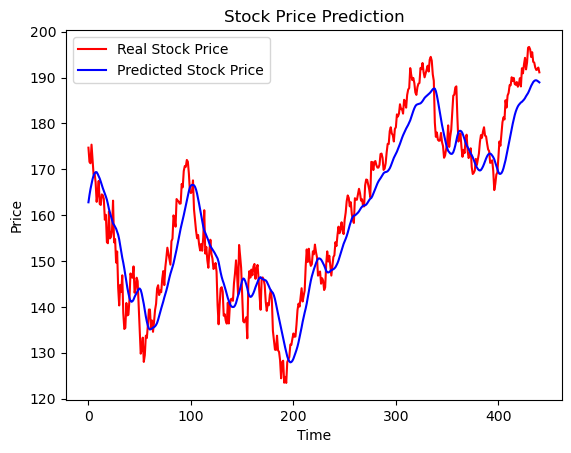

In [24]:
plt.plot(real, color='red', label='Real Stock Price')
plt.plot(predicted, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
trend = (real < predicted).astype(int)  # 1 = Up, 0 = Down